In [27]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import pandas as pd
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
from keras import backend as K


In [24]:
X_train = np.load('X-train.npy')
y_train = np.load('y-train.npy')
X_test = np.load('X-test.npy')
y_test = np.load('y-test.npy')

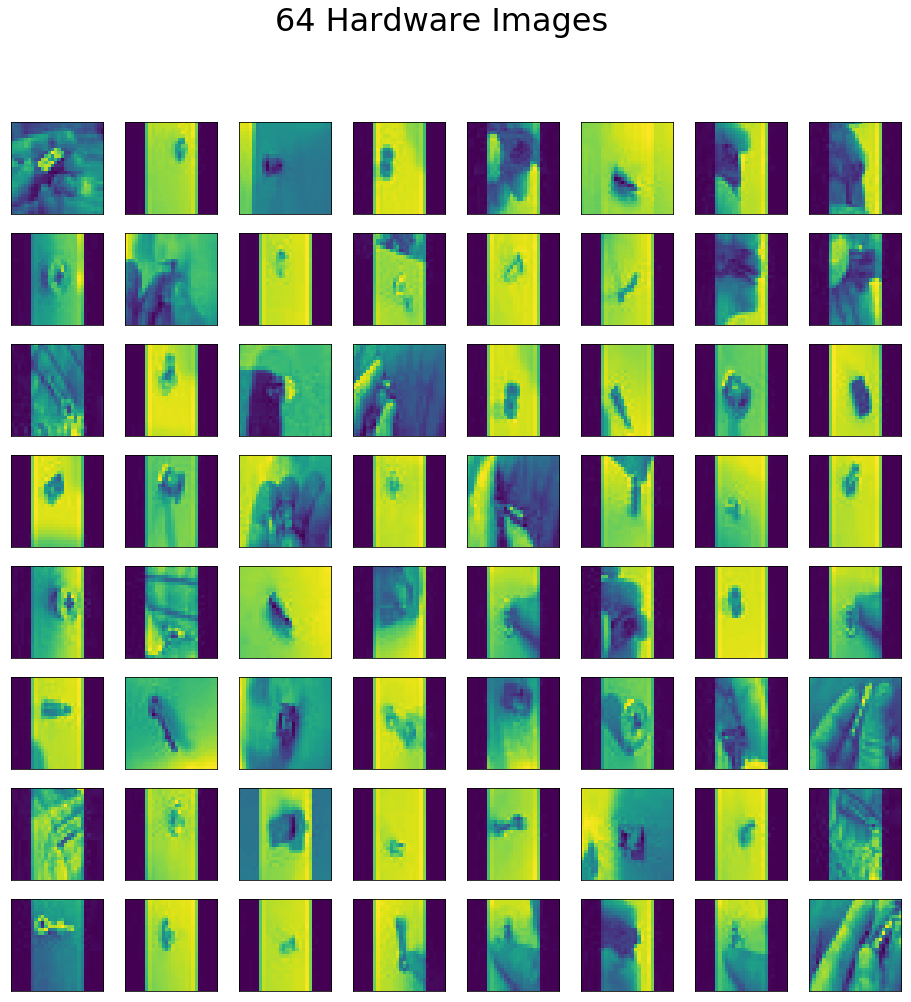

In [34]:
plt.figure(figsize=(16, 16))
for i in np.arange(64):
    plt.subplot(8, 8, i + 1)
    plt.imshow(X_train[i])
    plt.xticks(())
    plt.yticks(())
plt.suptitle('64 Hardware Images', fontsize=32)

plt.show()

In [3]:
X_train

array([[[ 99,  85,  78, ...,  73,  59,  52],
        [ 93,  86,  82, ...,  65,  48,  42],
        [ 83,  88,  86, ...,  64,  42,  32],
        ...,
        [ 52,  49,  59, ..., 131, 136, 127],
        [ 74,  76,  82, ..., 143, 148, 139],
        [ 79,  92, 102, ..., 124, 133, 127]],

       [[  0,   0,   1, ...,   0,   0,   0],
        [  0,   0,   1, ...,   0,   0,   0],
        [  0,   0,   1, ...,   0,   0,   0],
        ...,
        [  2,   0,   0, ...,   0,   0,   0],
        [  2,   1,   0, ...,   0,   0,   0],
        [  2,   1,   0, ...,   0,   0,   0]],

       [[240, 240, 237, ..., 139, 134, 131],
        [239, 239, 236, ..., 134, 130, 127],
        [237, 237, 234, ..., 129, 125, 123],
        ...,
        [195, 194, 199, ..., 109, 107, 106],
        [196, 195, 198, ..., 109, 107, 106],
        [197, 196, 198, ..., 109, 107, 106]],

       ...,

       [[194, 195, 195, ..., 190, 192, 194],
        [195, 195, 196, ..., 191, 193, 195],
        [196, 196, 197, ..., 192, 195, 197

In [ ]:
plt.figure(figsize=(16, 16))
for i in np.arange(100):
    plt.subplot(10, 10, i + 1)
    z = X_train.iloc[i]
    zz = np.array(z)
    image = zz.reshape((28,28))
    plt.imshow(image)
    plt.xticks(())
    plt.yticks(())
plt.suptitle('100 Images', fontsize=16)

plt.show()

In [4]:
X_train = X_train.reshape(4161, 784)
X_test = X_test.reshape(1041, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [5]:
# Convert class vectors to binary class matrices
# So instead of one column with 10 values, create 10 binary columns
y_train = keras.utils.to_categorical(y_train, 3)
y_test = keras.utils.to_categorical(y_test, 3)

In [6]:
# Start with a simple sequential model
model = Sequential()

# Add dense layers to create a fully connected MLP
# Note that we specify an input shape for the first layer, but only the first layer.
# Relu is the activation function used
model.add(Dense(64, activation='relu', input_shape=(784,)))
# Dropout layers remove features and fight overfitting
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
# End with a number of units equal to the number of classes we have for our outcome
model.add(Dense(3, activation='softmax'))

model.summary()

# Compile the model to put it all together.
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 195       
Total params: 54,595
Trainable params: 54,595
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = model.fit(X_train, y_train,
                    batch_size=128,
                    epochs=50,
                    verbose=1,
                    validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 4161 samples, validate on 1041 samples
Epoch 1/50
4161/4161 [==============================] - ETA: 0s - loss: 0.8964 - acc: 0.660 - 1s 120us/step - loss: 0.8793 - acc: 0.6669 - val_loss: 0.8087 - val_acc: 0.6945
Epoch 2/50
4161/4161 [==============================] - 0s 38us/step - loss: 0.8086 - acc: 0.7006 - val_loss: 0.7299 - val_acc: 0.7426
Epoch 3/50
4161/4161 [==============================] - 0s 37us/step - loss: 0.7699 - acc: 0.7171 - val_loss: 0.7275 - val_acc: 0.7406
Epoch 4/50
4161/4161 [==============================] - 0s 38us/step - loss: 0.7345 - acc: 0.7263 - val_loss: 0.6836 - val_acc: 0.7637
Epoch 5/50
4161/4161 [==============================] - 0s 38us/step - loss: 0.7142 - acc: 0.7337 - val_loss: 0.7528 - val_acc: 0.7137
Epoch 6/50
4161/4161 [==============================] - 0s 37us/step - loss: 0.6918 - acc: 0.7371 - val_loss: 0.6241 - val_acc: 0.7579
Epoch 7/50
4161/4161 [==============================] - 0s 38us/step - loss: 0.6758 - acc: 0.7395 - val

In [8]:
X_train = np.load('X-train.npy')
y_train = np.load('y-train.npy')
X_test = np.load('X-test.npy')
y_test = np.load('y-test.npy')

In [9]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [10]:
# input image dimensions, from our data
img_rows, img_cols = 28, 28
num_classes = 3


if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


# Building the Model
model = Sequential()
# First convolutional layer, note the specification of shape
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(X_train, y_train,
          batch_size=128,
          epochs=50,
          verbose=1,
          validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

X_train shape: (4161, 28, 28, 1)
4161 train samples
1041 test samples
Train on 4161 samples, validate on 1041 samples
Epoch 1/50
4161/4161 [==============================] - 22s 5ms/step - loss: 0.9601 - acc: 0.6133 - val_loss: 0.9423 - val_acc: 0.6196
Epoch 2/50
4161/4161 [==============================] - 26s 6ms/step - loss: 0.9391 - acc: 0.6200 - val_loss: 0.9288 - val_acc: 0.6196
Epoch 3/50
4161/4161 [==============================] - 28s 7ms/step - loss: 0.9315 - acc: 0.6200 - val_loss: 0.9321 - val_acc: 0.6196
Epoch 4/50
4161/4161 [==============================] - 25s 6ms/step - loss: 0.9351 - acc: 0.6200 - val_loss: 0.9281 - val_acc: 0.6196
Epoch 5/50
4161/4161 [==============================] - 25s 6ms/step - loss: 0.9337 - acc: 0.6200 - val_loss: 0.9282 - val_acc: 0.6196
Epoch 6/50
4161/4161 [==============================] - 25s 6ms/step - loss: 0.9350 - acc: 0.6200 - val_loss: 0.9507 - val_acc: 0.6196
Epoch 7/50
4161/4161 [==============================] - 25s 6ms/step - l

In [35]:
X_train = np.load('X-train-rgb.npy')
y_train = np.load('y-train-rgb.npy')
X_test = np.load('X-test-rgb.npy')
y_test = np.load('y-test-rgb.npy')
X_val = np.load('X-val-rgb.npy')
y_val = np.load('y-val-rgb.npy')

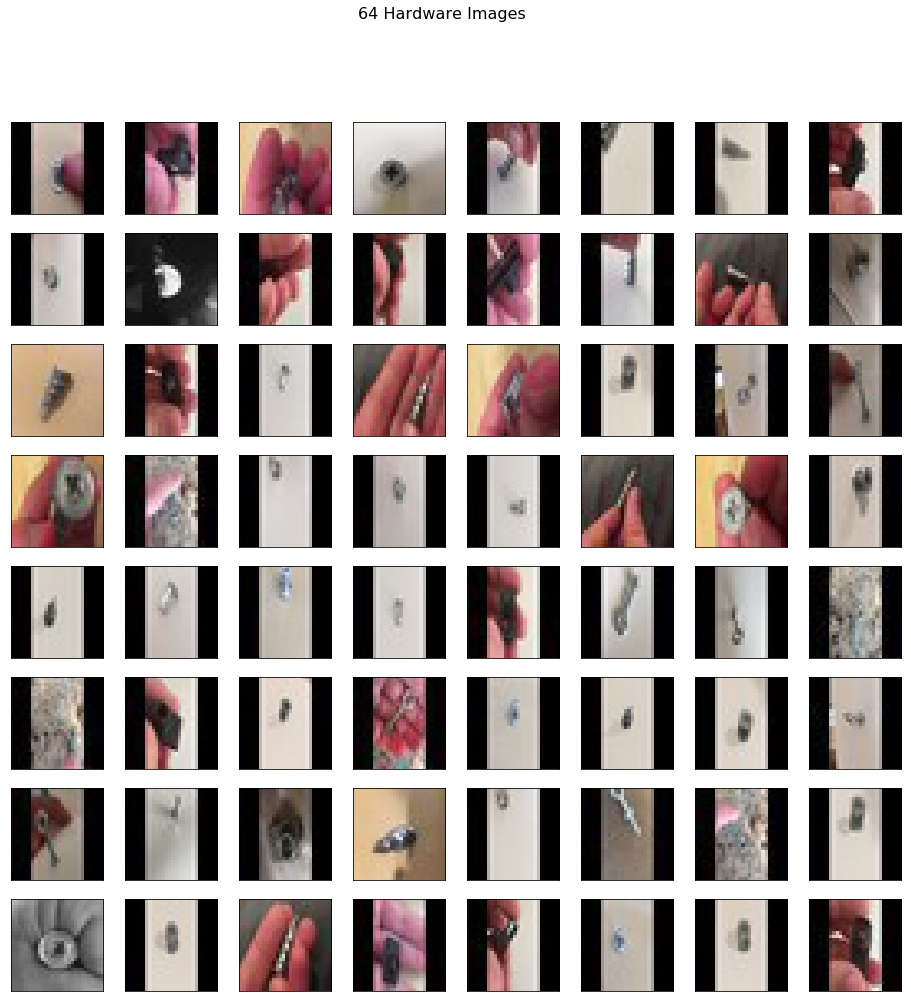

In [36]:
plt.figure(figsize=(16, 16))
for i in np.arange(64):
    plt.subplot(8, 8, i + 1)
    plt.imshow(X_train[i])
    plt.xticks(())
    plt.yticks(())
plt.suptitle('64 Hardware Images', fontsize=16)

plt.show()

In [20]:
val_score = []

In [21]:
# input image dimensions, from the data
img_rows, img_cols = 28, 28
num_classes = 3


if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 3, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 3, img_rows, img_cols)
    X_val = X_val.reshape(X_val.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 3)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 3)
    X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')
X_train /= 255
X_test /= 255
X_val /= 255

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)

# Building the Model
model = Sequential()
# First convolutional layer, note the specification of shape
model.add(Conv2D(32, kernel_size=(3, 3),
                    activation='relu',
                    input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
                optimizer=keras.optimizers.Adadelta(),
                metrics=['accuracy'])

model.fit(X_train, y_train,
            batch_size=128,
            epochs=70,
            verbose=1,
            validation_data=(X_test, y_test))
#score = model.evaluate(X_test, y_test, verbose=1)
#print('Test loss:', score[0])
#print('Test accuracy:', score[1])
score = model.evaluate(X_val, y_val, verbose=0)
print(score[1])
#val_score.append(score[1])

X_train shape: (3329, 28, 28, 3)
3329 train samples
937 test samples
Train on 3329 samples, validate on 937 samples
Epoch 1/100
3329/3329 [==============================] - 19s 6ms/step - loss: 0.9022 - acc: 0.6509 - val_loss: 0.9245 - val_acc: 0.6873
Epoch 2/100
3329/3329 [==============================] - 18s 6ms/step - loss: 0.7980 - acc: 0.7137 - val_loss: 1.2935 - val_acc: 0.6990
Epoch 3/100
3329/3329 [==============================] - 20s 6ms/step - loss: 0.7541 - acc: 0.7302 - val_loss: 0.7803 - val_acc: 0.6788
Epoch 4/100
3329/3329 [==============================] - 18s 5ms/step - loss: 0.6876 - acc: 0.7441 - val_loss: 0.8413 - val_acc: 0.6926
Epoch 5/100
3329/3329 [==============================] - 18s 6ms/step - loss: 0.6363 - acc: 0.7570 - val_loss: 1.1400 - val_acc: 0.3831
Epoch 6/100
3329/3329 [==============================] - 19s 6ms/step - loss: 0.6421 - acc: 0.7516 - val_loss: 0.8802 - val_acc: 0.7257
Epoch 7/100
3329/3329 [==============================] - 18s 6ms/ste

3329/3329 [==============================] - 16s 5ms/step - loss: 0.0527 - acc: 0.9859 - val_loss: 0.0631 - val_acc: 0.9787
Epoch 61/100
3329/3329 [==============================] - 16s 5ms/step - loss: 0.0489 - acc: 0.9874 - val_loss: 0.5109 - val_acc: 0.7866
Epoch 62/100
3329/3329 [==============================] - 16s 5ms/step - loss: 0.0712 - acc: 0.9826 - val_loss: 0.0486 - val_acc: 0.9840
Epoch 63/100
3329/3329 [==============================] - 16s 5ms/step - loss: 0.0365 - acc: 0.9919 - val_loss: 0.0492 - val_acc: 0.9829
Epoch 64/100
3329/3329 [==============================] - 16s 5ms/step - loss: 0.0698 - acc: 0.9784 - val_loss: 0.0613 - val_acc: 0.9819
Epoch 65/100
3329/3329 [==============================] - 16s 5ms/step - loss: 0.0650 - acc: 0.9787 - val_loss: 1.1949 - val_acc: 0.8378
Epoch 66/100
3329/3329 [==============================] - 16s 5ms/step - loss: 0.1330 - acc: 0.9658 - val_loss: 0.0610 - val_acc: 0.9819
Epoch 67/100
3329/3329 [==============================

In [28]:
score = model.evaluate(X_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.1655571073548407
Test accuracy: 0.8643162393162394
